In [17]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')

query1 = "select * from facts;"
data1 = pd.read_sql_query(query1,conn)
print(data1)

query2 = "select * from facts limit 5;"
data2 = pd.read_sql_query(query2,conn)
print(data2)

      id code                                           name       area  \
0      1   af                                    Afghanistan   652230.0   
1      2   al                                        Albania    28748.0   
2      3   ag                                        Algeria  2381741.0   
3      4   an                                        Andorra      468.0   
4      5   ao                                         Angola  1246700.0   
5      6   ac                            Antigua and Barbuda      442.0   
6      7   ar                                      Argentina  2780400.0   
7      8   am                                        Armenia    29743.0   
8      9   as                                      Australia  7741220.0   
9     10   au                                        Austria    83871.0   
10    11   aj                                     Azerbaijan    86600.0   
11    12   bf                                   Bahamas, The    13880.0   
12    13   ba            

In [13]:
query = "select min(population),max(population),min(population_growth),max(population_growth) from facts;"
data3 = conn.execute(query).fetchall()
min_pop = data3[0][0]
max_pop = data3[0][1]
min_pop_g = data3[0][2]
max_pop_g = data3[0][3]
print("minimum population:{0}".format(min_pop))
print("maximum population:{0}".format(max_pop))
print("minimum population growth:{0}".format(min_pop_g))
print("maximum population growth:{0}".format(max_pop_g))


minimum population:0
maximum population:7256490011
minimum population growth:0.0
maximum population growth:4.02


In [16]:
query = "select name from facts where population = 0;"
data4 = conn.execute(query).fetchall()
print("Name of countries with zero population:{0}".format(data4))

query = "select name from facts where population = 7256490011;"
data4 = conn.execute(query).fetchall()
print("Name of countries with 7256490011 population:{0}".format(data4))

Name of countries with zero population:[('Antarctica',)]
Name of countries with 7256490011 population:[('World',)]


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


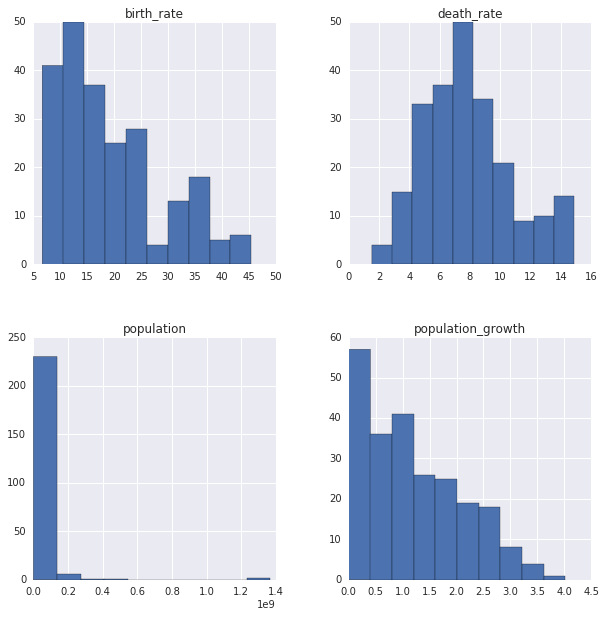

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query = "select population,population_growth,birth_rate,death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts);"
data5 = pd.read_sql_query(query,conn).hist(ax=ax)
plt

